In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e9/sample_submission.csv
/kaggle/input/playground-series-s5e9/train.csv
/kaggle/input/playground-series-s5e9/test.csv


# 1. Первый взгляд на данные

In [18]:
df_train = pd.read_csv('/kaggle/input/playground-series-s5e9/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s5e9/test.csv')

In [3]:
df_train.head()

id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0   0     0.603610      -7.636942      0.023500         0.000005   
1   1     0.639451     -16.267598      0.071520         0.444929   
2   2     0.514538     -15.953575      0.110715         0.173699   
3   3     0.734463      -1.357000      0.052965         0.001651   
4   4     0.532968     -13.056437      0.023500         0.068687   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.000001                   0.051385   0.409866      290715.6450   
1           0.349414                   0.170522   0.651010      164519.5174   
2           0.453814                   0.029576   0.423865      174495.5667   
3           0.159717                   0.086366   0.278745      225567.4651   
4           0.000001                   0.331345   0.477769      213960.6789   

     Energy  BeatsPerMinute  
0  0.826267       147.53020  
1  0.145400       136.15963  
2  0.624667        55.31989  
3  0.487467       147.91212  
4  0.947333        89.58511

In [4]:
df_test.head()

id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0  524164     0.410013     -16.794967      0.023500         0.232910   
1  524165     0.463071      -1.357000      0.141818         0.057725   
2  524166     0.686569      -3.368928      0.167851         0.287823   
3  524167     0.885793      -5.598049      0.118488         0.000005   
4  524168     0.637391      -7.068160      0.126099         0.539073   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.012689                   0.271585   0.664321      302901.5498   
1           0.257942                   0.097624   0.829552      221995.6643   
2           0.210915                   0.325909   0.304978      357724.0127   
3           0.376906                   0.134435   0.487740      271790.3989   
4           0.068950                   0.024300   0.591248      277728.5383   

     Energy  
0  0.424867  
1  0.846000  
2  0.134067  
3  0.316467  
4  0.481067

In [5]:
# все признаки числовые
df_train.info()
print('-' * 100)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB
------------------------------------------------------------------------------------------------

In [6]:
df_train.describe()

id    RhythmScore  AudioLoudness   VocalContent  \
count  524164.000000  524164.000000  524164.000000  524164.000000   
mean   262081.500000       0.632843      -8.379014       0.074443   
std    151313.257586       0.156899       4.616221       0.049939   
min         0.000000       0.076900     -27.509725       0.023500   
25%    131040.750000       0.515850     -11.551933       0.023500   
50%    262081.500000       0.634686      -8.252499       0.066425   
75%    393122.250000       0.739179      -4.912298       0.107343   
max    524163.000000       0.975000      -1.357000       0.256401   

       AcousticQuality  InstrumentalScore  LivePerformanceLikelihood  \
count    524164.000000      524164.000000              524164.000000   
mean          0.262913           0.117690                   0.178398   
std           0.223120           0.131845                   0.118186   
min           0.000005           0.000001                   0.024300   
25%           0.069413           0.000001                   0.077637   
50%           0.242502           0.074247                   0.166327   
75%           0.396957           0.204065                   0.268946   
max           0.995000           0.869258                   0.599924   

           MoodScore  TrackDurationMs         Energy  BeatsPerMinute  
count  524164.000000    524164.000000  524164.000000   524164.000000  
mean        0.555843    241903.692949       0.500923      119.034899  
std         0.225480     59326.601501       0.289952       26.468077  
min         0.025600     63973.000000       0.000067       46.718000  
25%         0.403921    207099.876625       0.254933      101.070410  
50%         0.564817    243684.058150       0.511800      118.747660  
75%         0.716633    281851.658500       0.746000      136.686590  
max         0.978000    464723.228100       1.000000      206.037000

In [7]:
df_test.describe()

id    RhythmScore  AudioLoudness   VocalContent  \
count  174722.000000  174722.000000  174722.000000  174722.000000   
mean   611524.500000       0.632591      -8.377495       0.074475   
std     50438.041204       0.157229       4.622288       0.050024   
min    524164.000000       0.140859     -27.442731       0.023500   
25%    567844.250000       0.514918     -11.550095       0.023500   
50%    611524.500000       0.634556      -8.253186       0.066432   
75%    655204.750000       0.739179      -4.903740       0.107302   
max    698885.000000       0.975000      -1.357000       0.258857   

       AcousticQuality  InstrumentalScore  LivePerformanceLikelihood  \
count    174722.000000      174722.000000              174722.000000   
mean          0.262903           0.117407                   0.178317   
std           0.222899           0.131628                   0.118165   
min           0.000005           0.000001                   0.024300   
25%           0.069448           0.000001                   0.077821   
50%           0.242412           0.073968                   0.165956   
75%           0.396870           0.202977                   0.268133   
max           0.995000           0.680914                   0.599544   

           MoodScore  TrackDurationMs         Energy  
count  174722.000000    174722.000000  174722.000000  
mean        0.555861    241753.736419       0.500545  
std         0.226218     59103.896616       0.290550  
min         0.025600     63973.000000       0.000067  
25%         0.403788    207518.151300       0.253817  
50%         0.566015    243584.585400       0.511867  
75%         0.716694    281737.445300       0.746133  
max         0.978000    449288.808400       0.999867

In [8]:
# пропусков нет
df_train.isnull().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

In [9]:
df_test.isnull().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
dtype: int64

In [10]:
# дубликатов нет
df_train.duplicated().sum()

0

In [11]:
df_test.duplicated().sum()

0

# 2. EDA и первичная обработка данных

In [19]:
# сразу удалим признак id (он совпадает с индексом)
df_train = df_train.drop(columns='id')
df_test = df_test.drop(columns='id')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


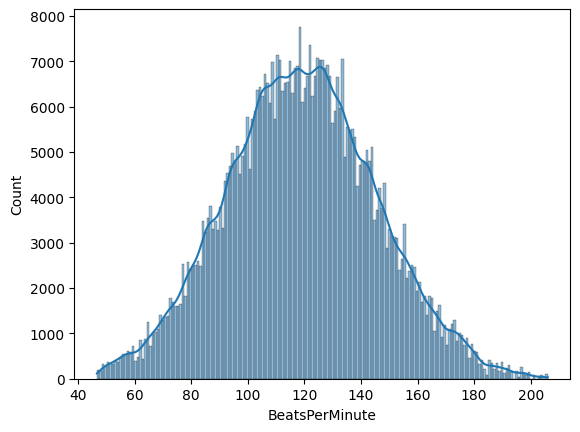

In [13]:
# посмотрим на распределение целевой переменной
# распределение похоже на нормальное
sns.histplot(df_train['BeatsPerMinute'], kde=True);

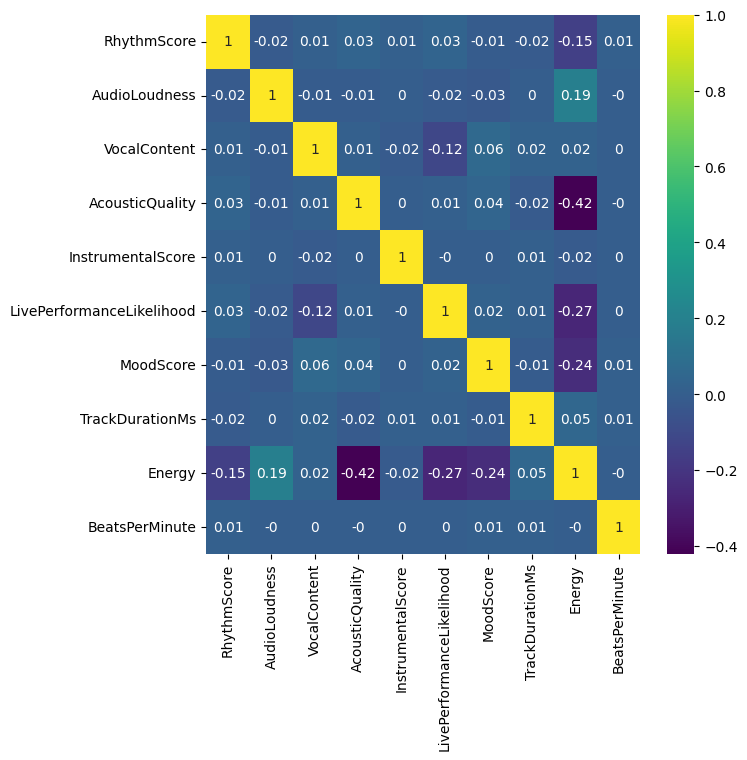

In [15]:
# оценим корреляцию между числовыми признаками
plt.figure(figsize=(7, 7), dpi=100)
sns.heatmap(df_train.corr(numeric_only=True).round(2), annot=True, cmap='viridis');
# нигде нет существенной корреляции

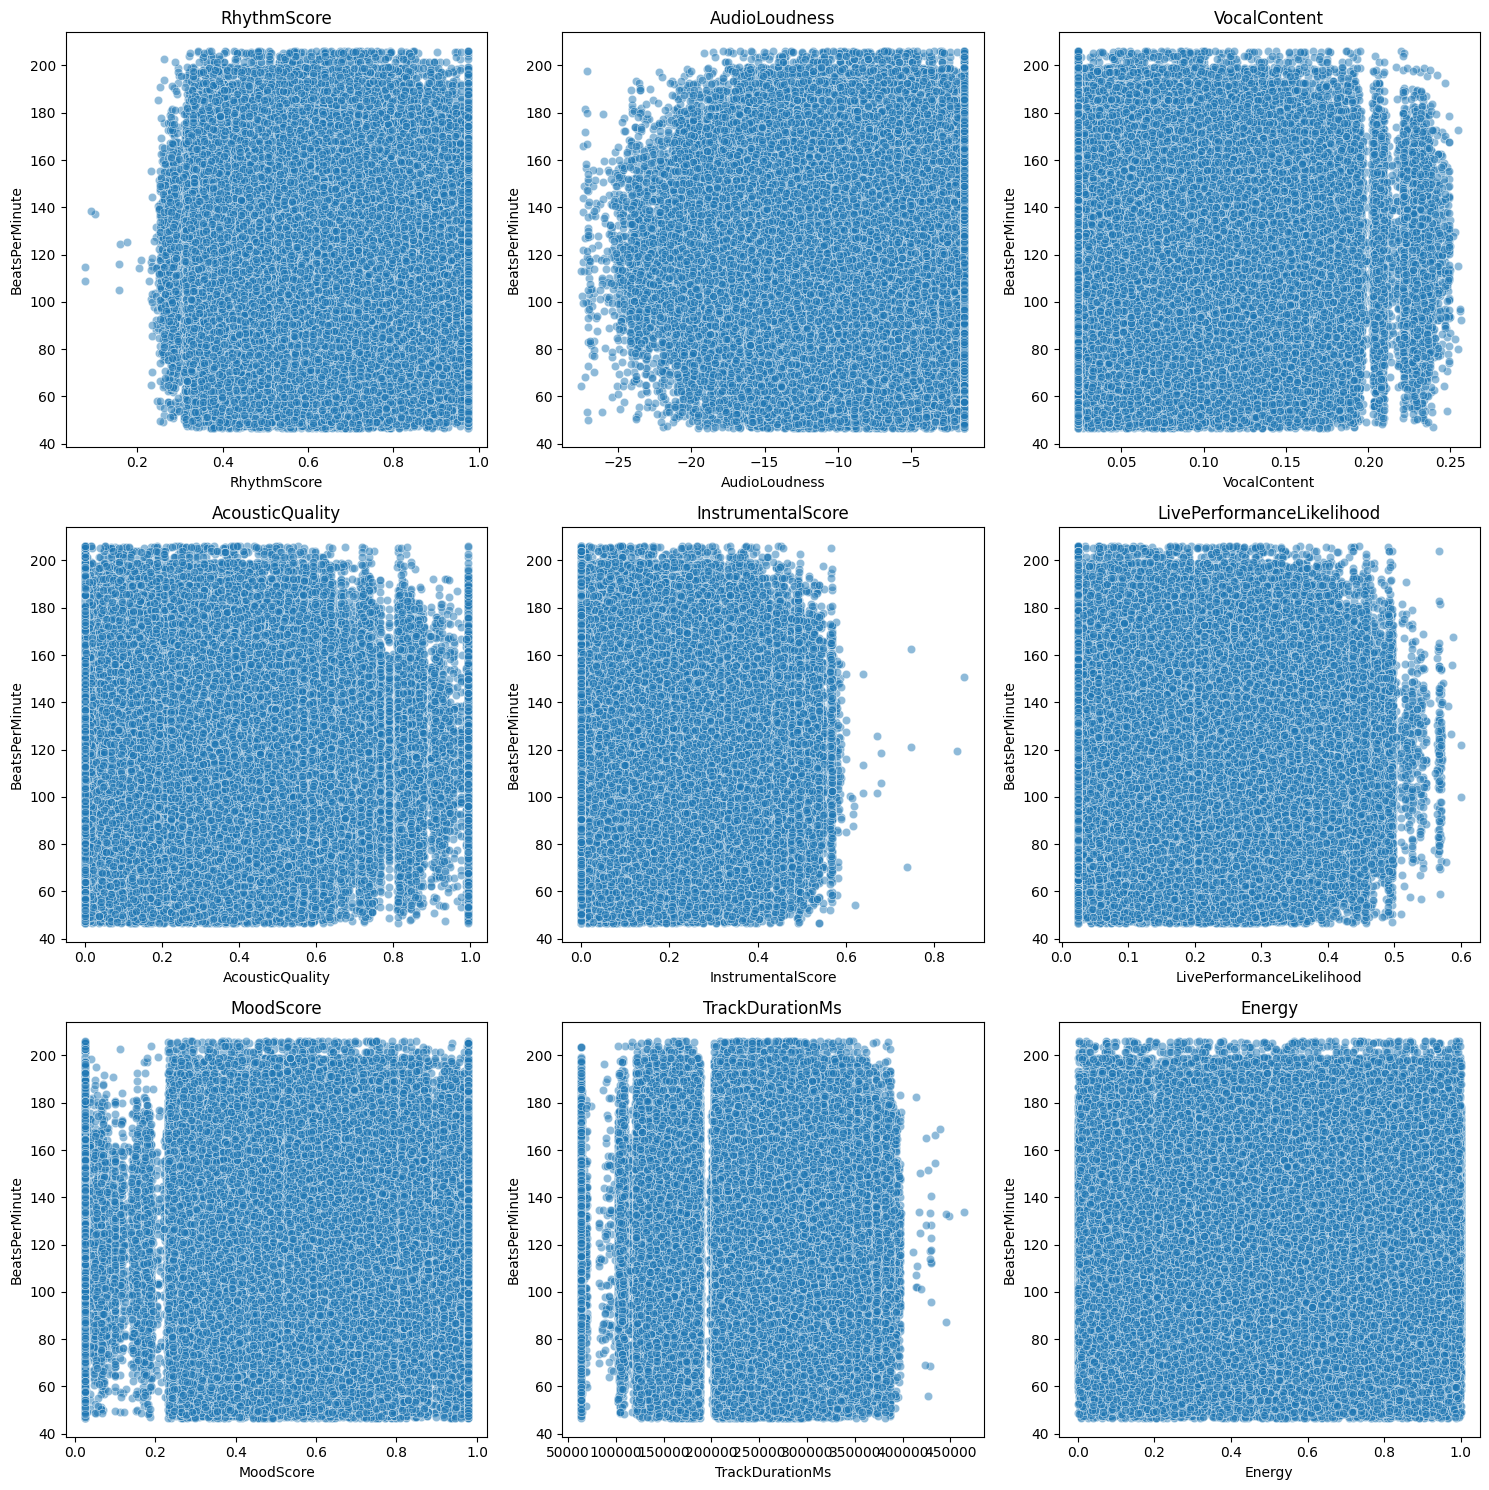

In [16]:
# оценим визуально зависимость целевой переменной от всех признаков
def num_features_vis(X):
    fig, ax = plt.subplots(3, 3, figsize=(15, 15))
    ax = ax.flatten()
    for i, col in enumerate(X.drop(columns='BeatsPerMinute').columns):
        sns.scatterplot(x=X[col], y=X['BeatsPerMinute'], ax=ax[i], alpha=0.5);
        ax[i].set_title(col)

    plt.tight_layout()


num_features_vis(df_train)
# с таким количеством образов и их распределением нет возможности
# анализировать какие-либо зависимости между признаками.
# также можно сказать, что есть выбросы в признаках
# RhythmScore, InstrumentalScore, TrackDurationMs, но
# сложно оценить понятие выброса в таком датасете, к
# тому же визуально таких точек немного

**Выводы**

Признаков мало, и все они числовые. Необходимо использовать их все и, возможно, создать новые

# 3. Обработка данных

In [20]:
# разделим данные на признаки и таргет
X_train = df_train.drop(columns='BeatsPerMinute')
y_train = df_train['BeatsPerMinute']

X_test = df_test

**3.1 Обработка пропусков**

Пропусков в данном датасете нет

**3.2 Работа с выбросами**

Интересный вопрос - в какой момент определять выбросы - до создания новых признаков или после?

In [18]:
# определим выбросы через IQR
def outlier_count(X):
    Q25, Q75 = X.quantile(0.25, axis=0), X.quantile(0.75, axis=0)
    IQR = Q75 - Q25
    lower_bound, upper_bound = Q25 - 1.5 * IQR, Q75 + 1.5 * IQR
    
    # доля выбросов для каждого признака в процентах
    quantity = ((X >= upper_bound) | (X <= lower_bound)).sum(axis=0) / X.shape[0] * 100
    return quantity.sort_values(ascending=False)


outlier_count(X_train)
# выбросов немного

AcousticQuality              1.287002
TrackDurationMs              0.814058
InstrumentalScore            0.542769
AudioLoudness                0.337681
VocalContent                 0.237521
LivePerformanceLikelihood    0.024611
RhythmScore                  0.001526
MoodScore                    0.000000
Energy                       0.000000
dtype: float64

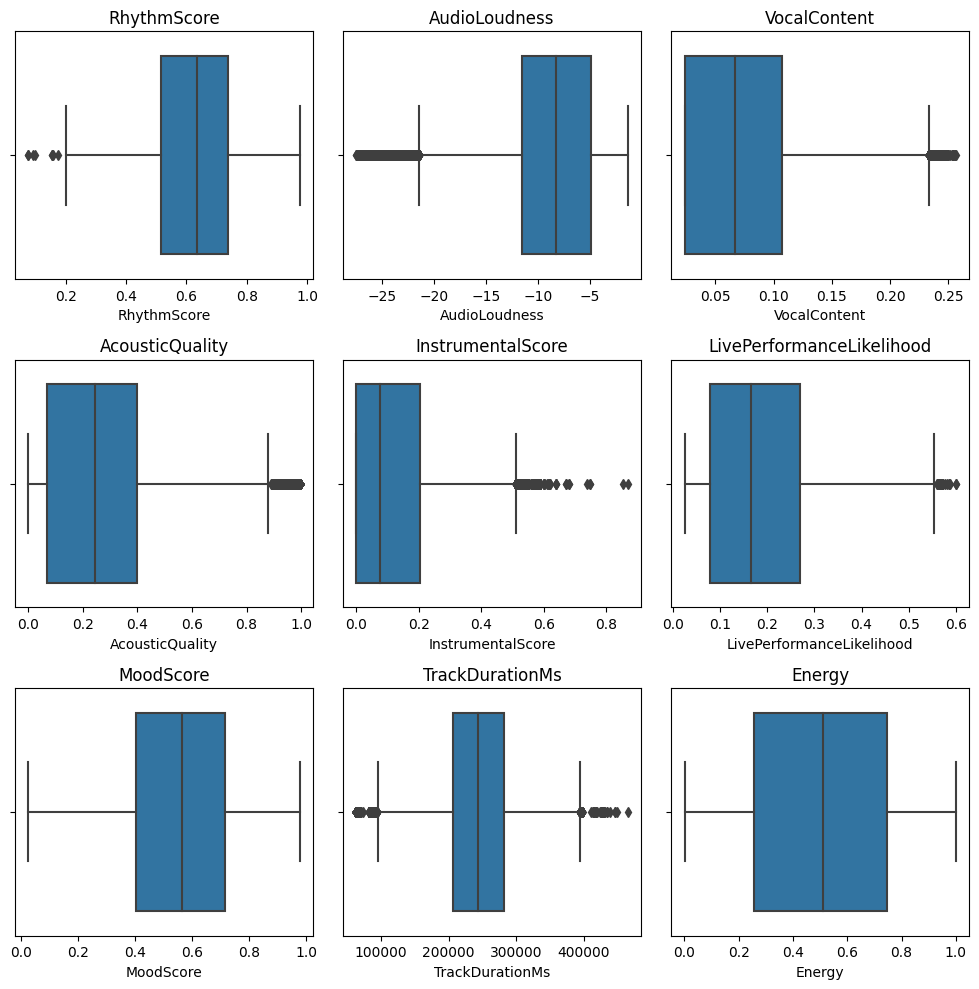

In [19]:
# посмотрим на выбросы
def outliers_vis(X):
    fig, ax = plt.subplots(3, 3, figsize=(10, 10))
    ax = ax.flatten()
    for i, col in enumerate(X.columns):
        sns.boxplot(x=X[col], ax=ax[i]);
        ax[i].set_title(col)

    plt.tight_layout()


outliers_vis(X_train)

In [21]:
# создадим маску, убирающую выбросы через IQR
# ее можно будет применить перед этапом моделирования в случае удаления выбросов

def outlier_remove(X):
    Q25, Q75 = X.quantile(0.25, axis=0), X.quantile(0.75, axis=0)
    IQR = Q75 - Q25
    lower_bound, upper_bound = Q25 - 1.5 * IQR, Q75 + 1.5 * IQR
    
    # маска, соответствующая значениям без выбросов в данных столбцах
    mask = ((X >= lower_bound) & (X <= upper_bound)).all(axis=1)
    return mask


mask_for_outliers = outlier_remove(X_train)
# доля оставшихся данных (в % от исходных)
mask_for_outliers.sum() / df_train.shape[0] * 100

96.79012675422196

**3.3 Создание новых признаков**

1. Создадим новый признак SumScore как сумму RhythmScore, InstrumentalScore и MoodScore.
При этом старые удалим, чтобы избежать мультиколлинеарности.
2. Попробуем создать новые признаки через PolynomialFeatures

In [22]:
X_train['SumScore'] = X_train['RhythmScore'] + X_train['InstrumentalScore'] + X_train['MoodScore']
X_train = X_train.drop(columns=['RhythmScore', 'InstrumentalScore', 'MoodScore'])

X_test['SumScore'] = X_test['RhythmScore'] + X_test['InstrumentalScore'] + X_test['MoodScore']
X_test = X_test.drop(columns=['RhythmScore', 'InstrumentalScore', 'MoodScore'])

X_train.head()

AudioLoudness  VocalContent  AcousticQuality  LivePerformanceLikelihood  \
0      -7.636942      0.023500         0.000005                   0.051385   
1     -16.267598      0.071520         0.444929                   0.170522   
2     -15.953575      0.110715         0.173699                   0.029576   
3      -1.357000      0.052965         0.001651                   0.086366   
4     -13.056437      0.023500         0.068687                   0.331345   

   TrackDurationMs    Energy  SumScore  
0      290715.6450  0.826267  1.013477  
1      164519.5174  0.145400  1.639876  
2      174495.5667  0.624667  1.392217  
3      225567.4651  0.487467  1.172925  
4      213960.6789  0.947333  1.010739

In [22]:
# эту ячейку можно закомментировать, если не добавляем полиномиальные признаки
# from sklearn.preprocessing import PolynomialFeatures

# при interaction_only=True создаются только признаки взаимодействия
# poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# X_train = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names_out())
# X_test = pd.DataFrame(poly.transform(X_test), columns=poly.get_feature_names_out())

**3.4 Кодирование категориальных переменных**

Категориальных переменных в данном датасете нет

**3.5 Масштабирование и преобразование числовых признаков**

In [23]:
# сначала посмотрим, насколько числовые признаки близки к нормальному распределению
from scipy.stats import kstest, shapiro, skew 

def norm_distr_check(X):
    df_norm_distr = pd.DataFrame(columns=['Критерий Колмогорова-Смирнова (p-value)', 
                                          'Критерий Шапиро-Уилка (p-value)', 
                                          'Коэффициент асимметрии']
                                            ) # пустой фрейм под результаты
    for col in X.columns:
        df_norm_distr.loc[col, 'Критерий Колмогорова-Смирнова (p-value)'] = kstest(X[col], 'norm').pvalue
        df_norm_distr.loc[col, 'Критерий Шапиро-Уилка (p-value)'] = shapiro(X[col]).pvalue
        df_norm_distr.loc[col, 'Коэффициент асимметрии'] = skew(X[col])
        
    return df_norm_distr


norm_distr_check(X_train)
# можно сделать вывод, что все признаки имеют отличное от нормального распределение

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 524164.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 524164.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 524164.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 524164.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: sc

Критерий Колмогорова-Смирнова (p-value)  \
AudioLoudness                                                 0.0   
VocalContent                                                  0.0   
AcousticQuality                                               0.0   
LivePerformanceLikelihood                                     0.0   
TrackDurationMs                                               0.0   
Energy                                                        0.0   
SumScore                                                      0.0   

                          Критерий Шапиро-Уилка (p-value)  \
AudioLoudness                                         0.0   
VocalContent                                          0.0   
AcousticQuality                                       0.0   
LivePerformanceLikelihood                             0.0   
TrackDurationMs                                       0.0   
Energy                                                0.0   
SumScore                                              0.0   

                          Коэффициент асимметрии  
AudioLoudness                          -0.308513  
VocalContent                            0.789109  
AcousticQuality                         0.785963  
LivePerformanceLikelihood               0.393321  
TrackDurationMs                        -0.190482  
Energy                                 -0.030343  
SumScore                                -0.01417

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

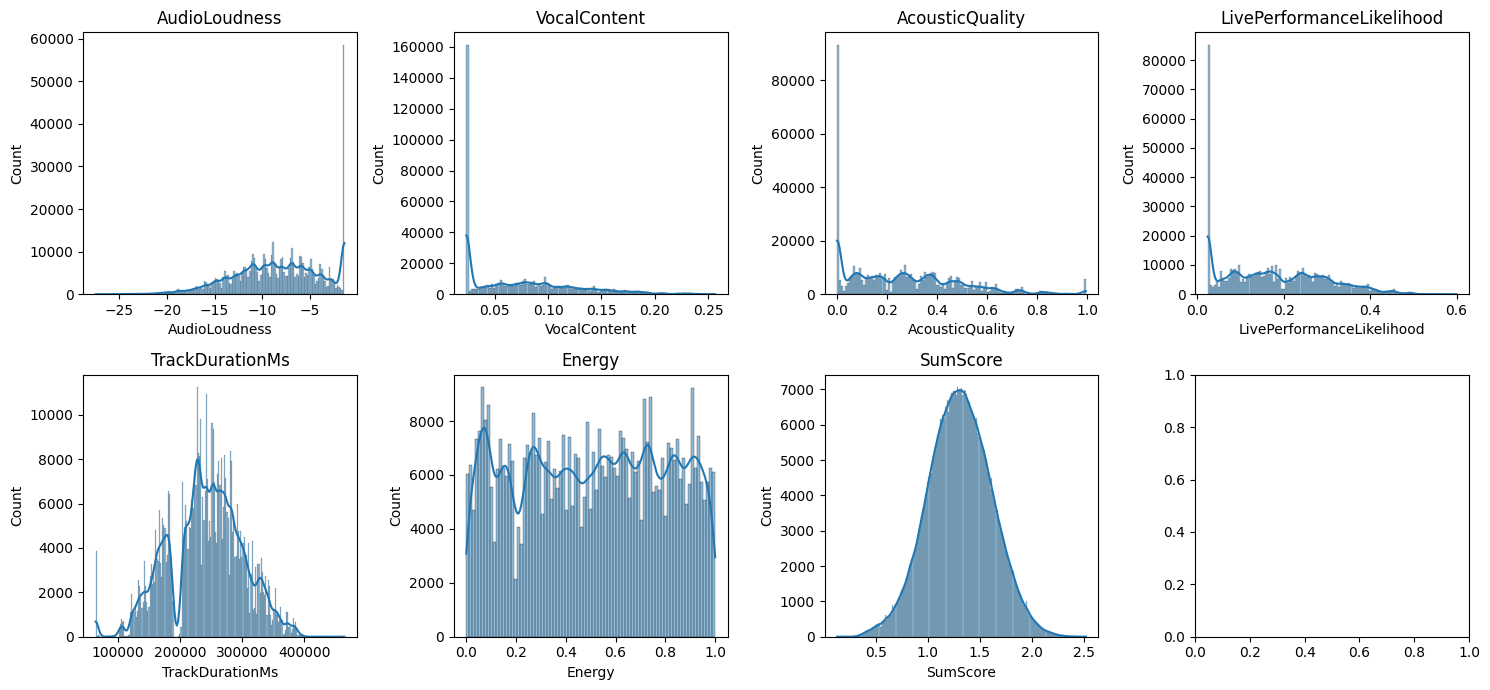

In [30]:
# оценим распределения числовых признаков визуально
def feature_vis(X):
    # размер 2x4 для признаков без полиномиальных,
    # размер 7x4 для признаков с полиномиальными
    fig, ax = plt.subplots(2, 4, figsize=(15, 7))
    ax = ax.flatten()

    for i, col in enumerate(X.columns):
        sns.histplot(X[col], ax=ax[i], kde=True);
        ax[i].set_title(col)

    plt.tight_layout()


feature_vis(X_train)
# новый признак SumScore выглядит как нормально распределенный

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [24]:
X_train_scaled.head()

AudioLoudness  VocalContent  AcousticQuality  LivePerformanceLikelihood  \
0       0.160753     -1.020114        -1.178322                  -1.074691   
1      -1.708885     -0.058541         0.815779                  -0.066641   
2      -1.640859      0.726325        -0.399847                  -1.259230   
3       1.521162     -0.430095        -1.170947                  -0.778712   
4      -1.013259     -1.020114        -0.870498                   1.294126   

   TrackDurationMs    Energy  SumScore  
0         0.822767  1.122062 -0.960739  
1        -1.304377 -1.226143  1.093910  
2        -1.136222  0.426774  0.281565  
3        -0.275361 -0.046407 -0.437734  
4        -0.471004  1.539602 -0.969722

In [9]:
X_test_scaled.head()

AudioLoudness  VocalContent  AcousticQuality  LivePerformanceLikelihood  \
0      -1.823128     -1.020114        -0.134470                   0.788482   
1       1.521162      1.349161        -0.919627                  -0.683456   
2       1.085323      1.870453         0.111648                   1.248127   
3       0.602434      0.881993        -1.178322                  -0.371990   
4       0.283967      1.034398         1.237720                  -1.303869   

   TrackDurationMs    Energy  SumScore  
0         1.028171 -0.262305 -0.719501  
1        -0.335567  1.190119  0.800962  
2         1.952251 -1.265230 -0.340849  
3         0.503766 -0.636160  1.456567  
4         0.603859 -0.068480 -0.028826

In [34]:
# финальная проверка на корректность данных
X_train_scaled.info()
print('-' * 100)
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   AudioLoudness              524164 non-null  float64
 1   VocalContent               524164 non-null  float64
 2   AcousticQuality            524164 non-null  float64
 3   LivePerformanceLikelihood  524164 non-null  float64
 4   TrackDurationMs            524164 non-null  float64
 5   Energy                     524164 non-null  float64
 6   SumScore                   524164 non-null  float64
dtypes: float64(7)
memory usage: 28.0 MB
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174722 entries, 0 to 174721
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   AudioL

In [35]:
X_train_scaled.isnull().sum().sum(), X_test_scaled.isnull().sum().sum()

(0, 0)

**3.6 Конструирование признаков**

Ранее был создан признак SumScore, и удалены старые признаки, образующие сумму. Также добавлены признаки, являющиеся произведениями исходных (опционально).

Попробуем применить PCA, чтобы оценить вклад признаков

In [36]:
from sklearn.decomposition import PCA

pca = PCA(3)
pca.fit(X_train_scaled)

# процент дисперсии, объясняемый каждым из выбранных компонентов (собств. числа ковариационной матрицы)
pca.explained_variance_ratio_
# с учетом малого числа исходных признаков и низкой корреляции между ними применение PCA нецелесообразно

array([0.23318783, 0.15953707, 0.14369847])

In [72]:
# применим L1-регуляризацию, чтобы определить важные признаки
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso.coef_
# Lasso зануляет абсолютно все коэффициенты (если не применяется PolynomialFeatures)

array([-0.,  0., -0.,  0.,  0., -0.,  0.])

**3.7 Удаление выбросов**

Удалим выбросы, использую ранее полученную маску

In [25]:
X_train_scaled = X_train_scaled[mask_for_outliers]
y_train = y_train[mask_for_outliers]

**3.8 Сокращение размеров датасета**

Т.к. датасет очень большой, возьмем только его часть, иначе подбор гиперпараметров зависает

In [28]:
# т.к. ранее удалялись выбросы, нужно сбросить индексы
X_train_scaled = X_train_scaled.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [29]:
# здесь параметром size определяем размер сокращенного датасета
indices = np.random.choice(X_train_scaled.shape[0], size=15000, replace=False)

X_train_scaled = X_train_scaled.loc[indices, :]
y_train = y_train[indices]

In [30]:
X_train_scaled.shape, y_train.shape

((15000, 7), (15000,))

# 4. Моделирование и оценка результата

**4.1 Random Forest**

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestRegressor

scores = pd.DataFrame() # пустой фрейм под все модели

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 200, 500, step=50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10, step=1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, step=1)
    rf_optuna = RandomForestRegressor(n_estimators=n_estimators, min_samples_split=min_samples_split, 
                                      min_samples_leaf=min_samples_leaf, random_state=42)
    # в соревновании используется метрика RMSE
    score = cross_val_score(rf_optuna, X_train_scaled, y_train, scoring='neg_root_mean_squared_error', cv=3).mean()
    return score
    

def model_score(model):
    # здесь оценим метрики регрессии
    score = cross_validate(model, X_train_scaled, y_train, cv=3, scoring=['neg_root_mean_squared_error', 'r2'])
    return {k: v.mean() for k, v in score.items()}


study = optuna.create_study(direction='maximize', study_name='Random Forest')
study.optimize(objective, n_trials=20)

rf_optuna_score = study.best_value
rf_optuna_params = study.best_params

scores.loc['Random Forest', 'Score'] = rf_optuna_score
scores.loc['Random Forest', 'Model_params'] = str([f'{k}: {v}' for k, v in rf_optuna_params.items()])

In [32]:
rf_optuna_params
# с удалением выбросов, без полиномиальных признаков и выборкой из 10000 образов (30 итераций)
# rf_optuna_params = {'n_estimators': 410, 'min_samples_split': 15, 'min_samples_leaf': 15}
# с удалением выбросов, без полиномиальных признаков и выборкой из 15000 образов (20 итераций)
# rf_optuna_params = {'n_estimators': 500, 'min_samples_split': 4, 'min_samples_leaf': 10}

{'n_estimators': 500, 'min_samples_split': 4, 'min_samples_leaf': 10}

In [33]:
rf = RandomForestRegressor(n_estimators=500, min_samples_split=4,
                           min_samples_leaf=10, random_state=42)
model_score(rf)

{'fit_time': 29.942517916361492,
 'score_time': 0.28620147705078125,
 'test_neg_root_mean_squared_error': -26.615652726372797,
 'test_r2': -0.019130260249742292}

In [34]:
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
submission_rf = pd.DataFrame({"id": pd.read_csv('/kaggle/input/playground-series-s5e9/test.csv')['id'],
                              "BeatsPerMinute": y_pred_rf
                             })
submission_rf.to_csv("submission_rf.csv", index=False)
print('✅ submission_rf.csv created successfully!')

# результат на test - 26.55223 с удалением выбросов, без полиномиальных признаков и выборкой из 10000 образов (30 итераций) (public score)
# результат на test - 26.63838 с удалением выбросов, без полиномиальных признаков и выборкой из 15000 образов (20 итераций) (public score)

✅ submission_rf.csv created successfully!


**4.2 GradienBoosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

def objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1, log=True)
    n_estimators = trial.suggest_int('n_estimators', 200, 500, step=50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20, step=2)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20, step=2)
    max_depth = trial.suggest_int('max_depth', 2, 10, step=2)
    grad_boost_optuna = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=n_estimators,
                                                  min_samples_split=min_samples_split,
                                                  min_samples_leaf=min_samples_leaf, max_depth=max_depth, 
                                                  random_state=42)
    score = cross_val_score(grad_boost_optuna, X_train_scaled, y_train, scoring='neg_root_mean_squared_error', cv=3).mean()
    return score


study = optuna.create_study(direction='maximize', study_name='Gradient Boosting')
study.optimize(objective, n_trials=20)

grad_boost_optuna_score = study.best_value
grad_boost_optuna_params = study.best_params

scores.loc['GradientBoosting', 'Score'] = grad_boost_optuna_score
scores.loc['GradientBoosting', 'Model_params'] = str([f'{k}: {v}' for k, v in grad_boost_optuna_params.items()])

In [36]:
grad_boost_optuna_params
# с удалением выбросов, без полиномиальных признаков и выборкой из 10000 образов (30 итераций)
# grad_boost_optuna_params = {'learning_rate': 0.0002428865003453735, 'n_estimators': 240, 
#                             'min_samples_split': 4, 'min_samples_leaf': 10, 'max_depth': 10}
# с удалением выбросов, без полиномиальных признаков и выборкой из 15000 образов (20 итераций)
# grad_boost_optuna_params = {'learning_rate': 0.000720863457589372, 'n_estimators': 300, 
#                             'min_samples_split': 10, 'min_samples_leaf': 16 'max_depth': 2}

{'learning_rate': 0.000720863457589372,
 'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 16,
 'max_depth': 2}

In [37]:
grad_boost = GradientBoostingRegressor(learning_rate=0.000720863457589372, n_estimators=300, 
                                       min_samples_split=10, min_samples_leaf=6, max_depth=2, random_state=42)
model_score(grad_boost)

{'fit_time': 4.5980433622996015,
 'score_time': 0.011561314264933268,
 'test_neg_root_mean_squared_error': -26.371931313484833,
 'test_r2': -0.0005381218952823508}

In [39]:
grad_boost.fit(X_train_scaled, y_train)
y_pred_grad_boost = grad_boost.predict(X_test_scaled)
submission_grad_boost = pd.DataFrame({"id": pd.read_csv('/kaggle/input/playground-series-s5e9/test.csv')['id'],
                                      "BeatsPerMinute": y_pred_grad_boost
                                     })
submission_grad_boost.to_csv("submission_grad_boost.csv", index=False)
print('✅ submission_grad_boost.csv created successfully!')

# результат на test - 26.39516 с удалением выбросов, без полиномиальных признаков и выборкой из 10000 образов (30 итераций) (public score)
# результат на test - 26.39521 с удалением выбросов, без полиномиальных признаков и выборкой из 15000 образов (20 итераций) (public score)

✅ submission_grad_boost.csv created successfully!


**4.3 CatBoost**

In [ ]:
from catboost import CatBoostRegressor

def objective(trial):
    iterations = trial.suggest_int('iterations', 200, 500, step=20)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1, log=True)
    depth = trial.suggest_int('depth', 1, 12, step=1)
    cat_boost_optuna = CatBoostRegressor(iterations=iterations, learning_rate=learning_rate,
                                         depth=depth, verbose=False, random_state=42)
    score = cross_val_score(cat_boost_optuna, X_train_scaled, y_train, scoring='neg_root_mean_squared_error', cv=4).mean()
    return score


study = optuna.create_study(direction='maximize', study_name='CatBoost')
study.optimize(objective, n_trials=100)

cat_boost_optuna_score = study.best_value
cat_boost_optuna_params = study.best_params

scores.loc['CatBoost', 'Score'] = cat_boost_optuna_score
scores.loc['CatBoost', 'Model_params'] = str([f'{k}: {v}' for k, v in cat_boost_optuna_params.items()])

In [43]:
cat_boost_optuna_params
# с удалением выбросов, без полиномиальных признаков и выборкой из 10000 образов (30 итераций)
# cat_boost_optuna_params = {'iterations': 300, 'learning_rate': 0.0019988865094918225, 'depth': 8}
# с удалением выбросов, без полиномиальных признаков и выборкой из 15000 образов (100 итераций)
# cat_boost_optuna_params = {'iterations': 220, 'learning_rate': 0.00026102348676634114, 'depth': 5}

{'iterations': 220, 'learning_rate': 0.00026102348676634114, 'depth': 5}

In [44]:
cat_boost = CatBoostRegressor(iterations=220, learning_rate=0.00026102348676634114,
                              depth=5, verbose=False, random_state=42)
model_score(cat_boost)

{'fit_time': 0.42727843920389813,
 'score_time': 0.003581523895263672,
 'test_neg_root_mean_squared_error': -26.373640654192318,
 'test_r2': -0.0006682305466912583}

In [45]:
cat_boost.fit(X_train_scaled, y_train)
y_pred_cat_boost = cat_boost.predict(X_test_scaled)
submission_cat_boost = pd.DataFrame({"id": pd.read_csv('/kaggle/input/playground-series-s5e9/test.csv')['id'],
                                     "BeatsPerMinute": y_pred_cat_boost
                                     })
submission_cat_boost.to_csv("submission_cat_boost.csv", index=False)
print('✅ submission_cat_boost.csv created successfully!')

# результат на test - 26.39375 с удалением выбросов, без полиномиальных признаков и выборкой из 10000 образов (30 итераций) (public score)
# результат на test - 26.39460 с удалением выбросов, без полиномиальных признаков и выборкой из 15000 образов (100 итераций) (public score)

✅ submission_cat_boost.csv created successfully!


In [46]:
scores

Score                                       Model_params
Random Forest    -26.615653  ['n_estimators: 500', 'min_samples_split: 4', ...
GradientBoosting -26.371581  ['learning_rate: 0.000720863457589372', 'n_est...
CatBoost         -26.368737  ['iterations: 220', 'learning_rate: 0.00026102...